# Classification Metrics

Um die Leistung eines Klassifikationsmodells (binär) zu messen, haben wir folgende Maßzahlen (metrics).  
Bei Sklearn findet man die Funktionen zur Berechnung von diesen Metrics [hier](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

- Accuracy
- Precision
- F1-Score

### Confusion Matrix
ist eine Matrix, inder die positiven und negativen Einschätzungen im Vergleich zu den realen Werten angezeigt werden können.  
Dazu einige Beispiele aus Sklearns [Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

## Confusion Matrix: Visualisierung
Eine Confusionmatrix kann visualisiert werden [Quelle](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

Verwirrungsmatrix:
 [[12  1]
 [ 2 10]]
True Negatives: 12
False Positives: 1
False Negatives: 2
True Positives: 10


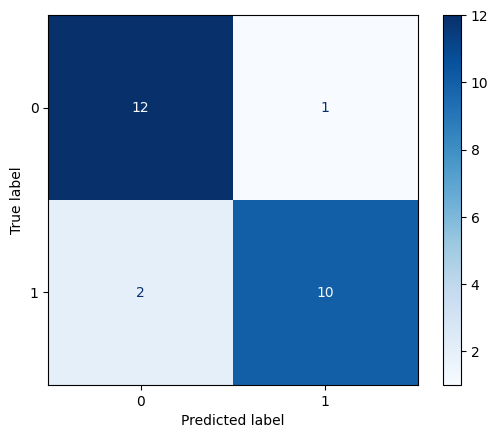

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification  # Einen Datensatz simulieren: imaginären Datensatz für eine Klassifikation erstellen
from sklearn.model_selection import train_test_split  # Daten aufteilen in Train und Test
from sklearn.svm import SVC  # Support Vector Classifier (Klassifikationsmodell)
import warnings
warnings.filterwarnings('ignore')

# Datensatz simulieren
X, y = make_classification(random_state=0)  # by default 100 Samples, 20 Features, 2 Klassen

# Daten aufsplitten: Training und Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Modell erstellen
clf = SVC(random_state=0)

# Modell trainieren
clf.fit(X_train, y_train)

# Vorhersagen machen
y_pred = clf.predict(X_test)

# Verwirrungsmatrix berechnen
con = confusion_matrix(y_test, y_pred)

# Ausgeben der Verwirrungsmatrix und der einzelnen Werte
print('Verwirrungsmatrix:\n', con)
print('True Negatives:', con[0][0])
print('False Positives:', con[0][1])
print('False Negatives:', con[1][0])
print('True Positives:', con[1][1])

# Verwirrungsmatrix visualisieren
disp = ConfusionMatrixDisplay(confusion_matrix=con)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [14]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



### Wie interpretiert man diese Ergebnisse?
- alle Werte von Metrics liegen zwischen 0 und 1. Je größer, desto besser.
- Allein Accuracy reicht nicht aus, um das Modell als _optimal_ zu berücksichtigen
- Recall und f1-Score sind dabei entscheidend - je größer desto besser UND die Werte von z.B. recall/f1-score für jedes Label müssen nah an einander liegen.

_Hinweis_: Wenn die Scores nicht nah an einander liegen, dann heißt es:
- entweder ist der Datensatz nicht balanziert (Manche Klassen haben deutlich mehr Exemplare im Datensatz)
- oder das Modell ist über- bzw. untertrainiert (Das Hyperparameter ändern und ausprobieren)

## Formel und Funktionen
Für jedes Metric steht uns eine individuelle Funktion [zur Verfügung](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report).
Die Funktion `classification_report` berechnet gleichzeitig alle diese Metrics für uns.

### Accuracy

$\text{accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$

### Precision

$\text{precision} = \frac{TP}{TP+FP}$

### Recall

$\text{recall} = \frac{TP}{TP+FN}$

### F1 Score

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

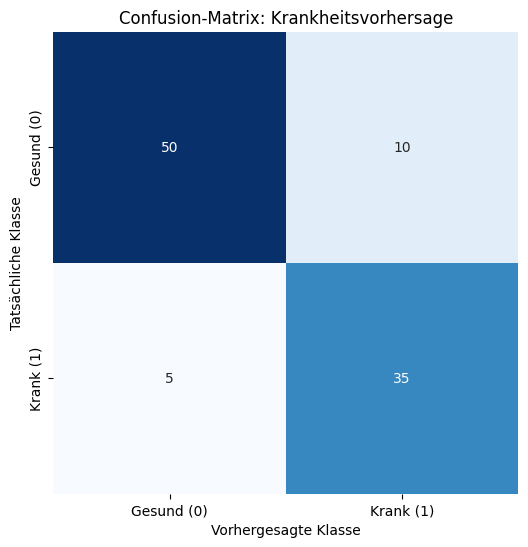

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Beispiel für eine Confusion-Matrix zur Krankheitsvorhersage
# Daten: 100 Personen, 60 gesund, 40 krank
# Vorhersage: 35 Kranke korrekt erkannt (TP), 5 Kranke übersehen (FN),
# 50 Gesunde korrekt erkannt (TN), 10 Gesunde fälschlicherweise als krank erkannt (FP)

# Tatsächliche Klassen und vorhergesagte Klassen
true_labels = np.array([1] * 40 + [0] * 60)  # 40 Kranke (1), 60 Gesunde (0)
predicted_labels = np.array([1] * 35 + [0] * 5 + [1] * 10 + [0] * 50)  # Vorhersage wie im Beispiel

# Confusion-Matrix berechnen
cm = confusion_matrix(true_labels, predicted_labels)

# Visualisierung der Confusion-Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Gesund (0)', 'Krank (1)'], 
            yticklabels=['Gesund (0)', 'Krank (1)'])
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion-Matrix: Krankheitsvorhersage')
plt.show()

In [8]:
# Bericht über Klassifikationsmetriken (Precision, Recall, F1-Score)
# Nutzung von classification_report
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels, target_names=['Gesund (0)', 'Krank (1)'])
print("\nKlassifikationsbericht:")
print(report)


Klassifikationsbericht:
              precision    recall  f1-score   support

  Gesund (0)       0.91      0.83      0.87        60
   Krank (1)       0.78      0.88      0.82        40

    accuracy                           0.85       100
   macro avg       0.84      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100

